## Practical Work 1

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#### Read RegData csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [6]:
#RegData=np.loadtxt("RegData.csv", dtype=float)
from numpy import genfromtxt
Data = genfromtxt('RegData.csv', delimiter=',')

#### Explore your data

In [7]:
print(Data)

[[2.9000001  4.        ]
 [6.69999981 7.4000001 ]
 [4.9000001  5.        ]
 [7.9000001  7.19999981]
 [9.80000019 7.9000001 ]
 [6.9000001  6.0999999 ]
 [6.0999999  6.        ]
 [6.19999981 5.80000019]
 [6.         5.19999981]
 [5.0999999  4.19999981]
 [4.69999981 4.        ]
 [4.4000001  4.4000001 ]
 [5.80000019 5.19999981]]


#### Define variables X and y. Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [8]:
x_points=Data[:,0]
y_points=Data[:,1]


#### Explore your data

In [10]:
y_points

array([4.        , 7.4000001 , 5.        , 7.19999981, 7.9000001 ,
       6.0999999 , 6.        , 5.80000019, 5.19999981, 4.19999981,
       4.        , 4.4000001 , 5.19999981])

#### Plot the original data (scatter plot of X,y)

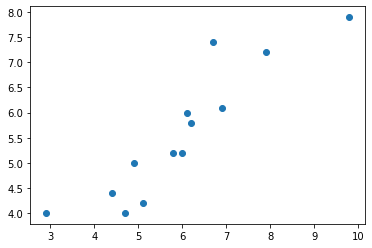

In [11]:
plt.scatter(x_points, y_points)
plt.show()

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate. 

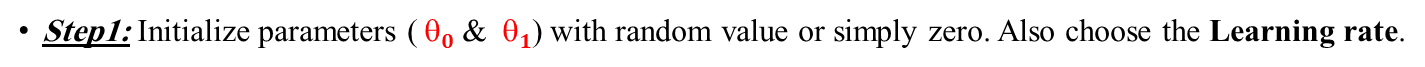

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.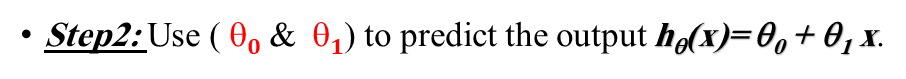
#### Note: you will need to iterate through all data points

### Step3: Calculate Cost function 𝑱(theta_0,theta_1 ).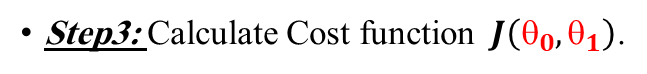
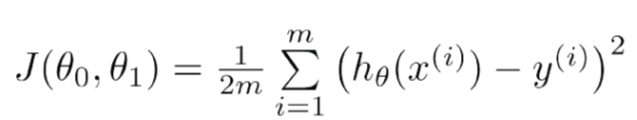

### Step4: Calculate the gradient.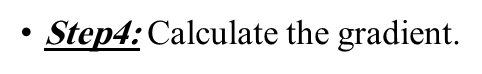
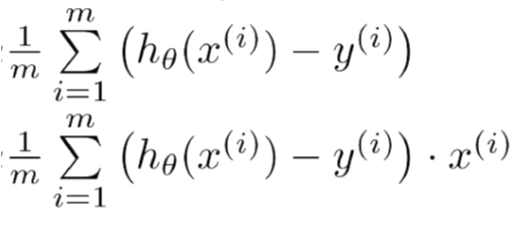

### Step5: Update the parameters (simultaneously).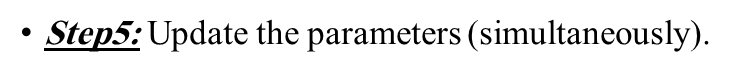
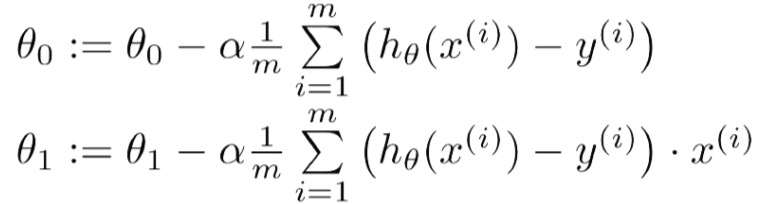

### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.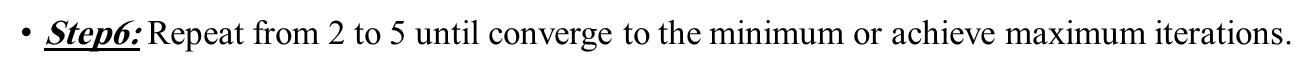

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

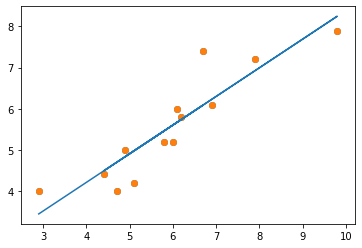

0.14245679755592838
1.4208372530075242
0.6966037780086975


In [12]:
#Full implemintion Batch
import numpy as np
import matplotlib.pyplot as plt
def cost(theta0,theta1,x_points,y_points):
    error=0
    m=len(x_points)
    for i in range(m):
        error+=((( theta0+x_points[i]*theta1 )-y_points[i])**2)
    error=(error/(2*m))
    return  error  
    
def difft0(theta0,theta1,x_points,y_points):
    error = 0
    m=len(x_points)
    for i in range(m):
        e=theta0+x_points[i]*theta1
        error+=((theta0+x_points[i]*theta1 )-y_points[i])
    error=(error/(2))
    return  error

def difft1(theta0,theta1,x_points,y_points):
    error = 0
    m=len(x_points)
    for i in range(m):
        e=theta0+x_points[i]*theta1
        error+=((theta0+x_points[i]*theta1 )-y_points[i])*x_points[i]
    error=(error/(2))
    return  error
def fit(x_points,y_points,initial_value,alpha,numOfItr):
    theta0=theta1=initial_value
    for i in range(numOfItr):
        accuresy= cost(theta0,theta1,x_points,y_points)
        dt0 = difft0(theta0,theta1,x_points,y_points)
        dt1 = difft1(theta0,theta1,x_points,y_points)
        theta0 = theta0 - alpha*dt0
        theta1 = theta1 - alpha*dt1
    return theta0,theta1,accuresy


plt.scatter(x_points, y_points)

alpha = 0.0001
theta0 , theta1,accuresy =fit(x_points,y_points,0.1,alpha,100000)
plt.scatter(x_points, y_points)
y_pred=[]
for x in (x_points):
    y_pred.append(theta0+theta1*x)


plt.plot(x_points,y_pred )
plt.show()
print(accuresy)
print(theta0)
print(theta1)

#### Use R2 score to evaluate LR equation output
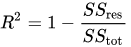
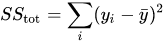
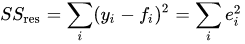
https://en.wikipedia.org/wiki/Coefficient_of_determination

In [13]:
from sklearn.metrics import r2_score
r2_score(y_points, y_pred)

0.8213078168625358

## GD vectorize Implementation
### Implement GD without iterate through data points i.e. use vector operations

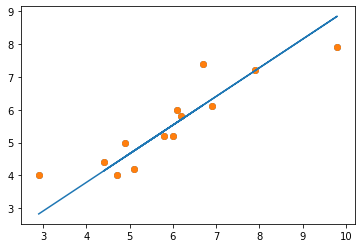

0.14245679755592838
0.3038037171803255
0.87119058361462


In [14]:
#Full implemintion Batch
import numpy as np
import matplotlib.pyplot as plt
cost2=[]
def cost(theta0,theta1,x_points,y_points):
    
    m=len(x_points)
    h=(theta0+x_points*theta1)
    
    error=  sum((h-y_points)**2)
    return  error/(2*m ) 
    
def difft0(theta0,theta1,x_points,y_points):
    m=len(x_points)
    error= sum((theta0+x_points*theta1)-y_points)
    return  error/m  

def difft1(theta0,theta1,x_points,y_points):
    error = 0
    m=len(x_points)
    error=  sum(((theta0+x_points*theta1)-y_points) * x_points)
    return  error/m  
def fit(x_points,y_points,initial_value,alpha,numOfItr):
    theta0=theta1=initial_value
    
    for i in range(numOfItr):
        cost2.append( cost(theta0,theta1,x_points,y_points))
        dt0 = difft0(theta0,theta1,x_points,y_points)
        dt1 = difft1(theta0,theta1,x_points,y_points)
        theta0 = theta0 - alpha*dt0
        theta1 = theta1 - alpha*dt1
    return theta0,theta1,accuresy


plt.scatter(x_points, y_points)

alpha = 0.001
theta0 , theta1,accuresy =fit(x_points,y_points,0.1,alpha,1000)
plt.scatter(x_points, y_points)
y_pred=[]

y_pred=theta0+theta1*x_points


plt.plot(x_points,y_pred )

plt.show()
print(accuresy)
print(theta0)
print(theta1)

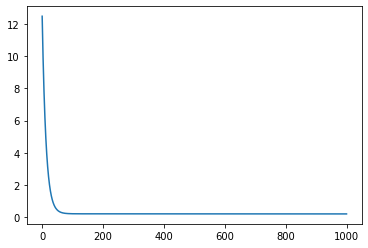

In [15]:
plt.plot(cost2)

#### Plot the output and calculate R2 score
##### Make sure that you obtained the same results

In [17]:
from sklearn.metrics import r2_score
r2_score(y_points, y_pred)

0.7643127143603415

## Plot loss function
### Repeat your last vectorized implementaion version and save loss for each iteration (epoch)

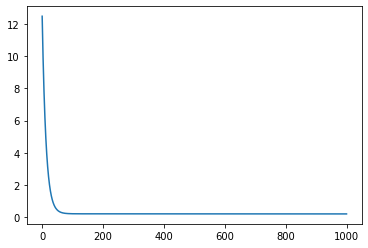

In [19]:
plt.plot(cost2)

### Plot loss vs. iterations

## Multivariate LR

#### Read MultipleLR csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [20]:
from numpy import genfromtxt
Data = genfromtxt('MultipleLR.csv', delimiter=',')

In [23]:
Data

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [24]:
x_points=Data[:,:-1]
y_points=Data[:,3]

In [25]:
y_points=np.reshape(25,1)
y_points

array([25])

In [26]:
y_points

array([25])

In [27]:
x_points.shape

(25, 3)

In [28]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])
np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [29]:
b=np.ones(len(x_points)).reshape(-1,1)
print(b.shape)
print(x_points.shape)
x_points=np.concatenate((b, x_points), axis=1)
x_points

(25, 1)
(25, 3)


array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

### Repeat your implementation but for more than one variable

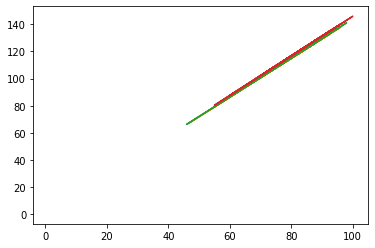

[0.1249   1.436792 1.440284 1.459812]


In [33]:
#Full implemintion Batch
import numpy as np
import matplotlib.pyplot as plt
cost2=[]
def cost(theta,x_points,y_points):
    
    m=len(x_points)
    h=(x_points*theta)
    
    error=  sum((h-y_points)**2)
    return  error/(2*m ) 
      

def difft(theta,x_points,y_points):
    error = 0
    m=len(x_points)
    error=  sum(((x_points*theta)-y_points) * x_points)
    return  error/m  
def fit(x_points,y_points,initial_value,alpha,numOfItr):
    theta=[initial_value]*x_points.shape[1]
    
    for i in range(numOfItr):
        cost2.append( cost(theta,x_points,y_points))
        dt = difft(theta,x_points,y_points)
       
        theta = theta - alpha*dt
        return theta
   

#plt.scatter(x_points, y_points)

alpha = 0.001
theta=fit(x_points,y_points,0.1,alpha,1000)
#plt.scatter(x_points, y_points)
y_pred=[]

y_pred=theta*x_points


plt.plot(x_points,y_pred )

plt.show()

print(theta)


#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

### Plot loss vs. iterations

In [60]:
y_pred.shape

(25, 3)

#### Use R2 score to evaluate LR equation output

In [18]:
from sklearn.metrics import r2_score
r2_score(y_points, y_pred)

0.7643127143603415

# Bonus
## LR Using sklearn

### Single Variable

#### Build a LR model usin linearmodel.LinearRegression() from sklearn library

#### Train the model (fit the model to the training data)

#### Predict y values using the trained model

#### Plot model output (fitted line) with the original data (scatter plot of X,y)

#### Use R2 score to evaluate model output

### Repeat for Mulivariate